In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as seabornInstance
from sklearn import metrics

In [2]:
dataset = pd.read_excel('call center data.xlsx')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Agent Quality of Service  126 non-null    int64
 1    Resolve Issue            126 non-null    int64
 2   Courteous                 126 non-null    int64
 3    Knowledgeable            126 non-null    int64
 4   Overall Experience        126 non-null    int64
dtypes: int64(5)
memory usage: 5.0 KB


In [4]:
dataset.describe()

,Agent Quality of Service,Resolve Issue,Courteous,Knowledgeable,Overall Experience
count,126.000000,126.000000,126.000000,126.000000,126.000000
mean,3.904762,3.841270,4.023810,4.015873,3.912698
std,1.069045,1.105714,0.880584,0.987799,1.027773
min,1.000000,1.000000,2.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000,3.000000
50%,4.000000,4.000000,4.000000,4.000000,4.000000
75%,5.000000,5.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000


In [5]:
df = dataset.copy()

In [6]:
#Selecting Metrics of features
X = df.iloc[:, 0:4]
Y = df.iloc[:, 4:5].values

In [7]:
print(X.shape)

(126, 4)


In [8]:
print(Y.shape)

(126, 1)


In [9]:
from sklearn.model_selection import train_test_split
#to give 4 variables namely: xtrain, xtest, ytrain, ytest
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, train_size = 0.8, random_state = 0)

print (X_train.shape)
print (Y_train.shape)
print (X_test.shape)
print (Y_test.shape)

(100, 4)
(100, 1)
(26, 4)
(26, 1)


In [10]:
#Standard scaler
'''
The StandardScaler assumes your data is normally distributed within each feature and will scale them 
such that the distribution is now centred around 0, with a standard deviation of 1.

The mean and standard deviation are calculated for the feature and then the feature is scaled based on:

xi–mean(x) / stdev(x)

'''
from sklearn.preprocessing import StandardScaler
Scaler_df = StandardScaler()

In [11]:
Scaler_df.fit(X)

StandardScaler()

In [12]:
scaled_inputs = Scaler_df.transform(X)

In [13]:
scaled_inputs

array([[-1.78885438, -2.57988286, -1.16728937, -3.06531366],
       [-0.84970583, -0.76387593, -0.02714626, -0.01613323],
       [ 0.08944272, -0.76387593,  1.11299684, -0.01613323],
       [ 0.08944272,  0.14412753, -1.16728937, -0.01613323],
       [ 1.02859127,  0.14412753,  1.11299684,  1.00026025],
       [-0.84970583, -1.6718794 , -0.02714626, -3.06531366],
       [ 1.02859127,  1.052131  ,  1.11299684,  1.00026025],
       [ 1.02859127,  0.14412753,  1.11299684,  1.00026025],
       [ 1.02859127,  0.14412753, -0.02714626, -1.03252671],
       [-0.84970583, -1.6718794 , -2.30743248, -1.03252671],
       [-0.84970583,  1.052131  , -0.02714626, -1.03252671],
       [ 1.02859127,  0.14412753,  1.11299684,  1.00026025],
       [-0.84970583,  1.052131  , -0.02714626, -0.01613323],
       [ 0.08944272,  0.14412753, -1.16728937,  1.00026025],
       [ 0.08944272, -0.76387593, -0.02714626, -0.01613323],
       [-1.78885438, -0.76387593, -0.02714626,  1.00026025],
       [ 1.02859127,  0.

In [14]:
from sklearn.model_selection import train_test_split

'''
The training set contains a known output and the model learns on this data in order to be generalized to other data.
'''

'\nThe training set contains a known output and the model learns on this data in order to be generalized to other data.\n'

In [15]:
train_test_split(scaled_inputs, Y)

[array([[-0.84970583,  1.052131  , -1.16728937, -0.01613323],
        [ 1.02859127,  1.052131  , -0.02714626,  1.00026025],
        [ 1.02859127, -0.76387593, -0.02714626, -0.01613323],
        [ 0.08944272,  0.14412753, -1.16728937,  1.00026025],
        [-0.84970583,  0.14412753, -1.16728937,  1.00026025],
        [ 1.02859127,  0.14412753, -0.02714626, -0.01613323],
        [ 1.02859127, -0.76387593,  1.11299684, -1.03252671],
        [-1.78885438, -2.57988286, -1.16728937, -3.06531366],
        [ 1.02859127,  0.14412753, -0.02714626,  1.00026025],
        [-0.84970583, -1.6718794 , -0.02714626, -1.03252671],
        [-2.72800293, -2.57988286, -1.16728937, -2.04892018],
        [ 1.02859127,  1.052131  , -0.02714626,  1.00026025],
        [ 1.02859127,  1.052131  , -0.02714626, -0.01613323],
        [ 0.08944272,  1.052131  ,  1.11299684, -0.01613323],
        [ 1.02859127,  0.14412753,  1.11299684,  1.00026025],
        [ 1.02859127, -0.76387593, -0.02714626,  1.00026025],
        

In [16]:
x_train, x_test, y_train,y_test = train_test_split(scaled_inputs, Y, train_size = 0.8)

In [17]:
print(x_train.shape, y_train.shape)

(100, 4) (100, 1)


In [18]:
print(x_test.shape, y_test.shape)

(26, 4) (26, 1)


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [20]:
reg = LinearRegression()

In [21]:
reg.fit(x_train, y_train)

LinearRegression()

In [22]:
reg.score(x_train, y_train)

0.5272181935537017

In [23]:
model_outputs = reg.predict(x_train)
model_outputs

array([[3.70069224],
       [4.10493853],
       [3.68046456],
       [3.68046456],
       [4.97119501],
       [4.97119501],
       [3.03655891],
       [1.96817929],
       [4.97119501],
       [4.76907186],
       [3.79040549],
       [4.12370664],
       [3.36986006],
       [4.32728936],
       [3.70069224],
       [3.94767201],
       [1.76605614],
       [3.25745016],
       [3.45957331],
       [3.52465761],
       [1.70243141],
       [3.25745016],
       [4.39091409],
       [2.03326359],
       [3.68192413],
       [4.32582978],
       [2.79103871],
       [4.10493853],
       [4.12516621],
       [3.23868206],
       [3.43348479],
       [3.68046456],
       [4.54818061],
       [4.32728936],
       [4.76907186],
       [3.47834141],
       [3.63706751],
       [4.54818061],
       [4.76907186],
       [3.90281539],
       [4.76907186],
       [4.32582978],
       [3.83919066],
       [4.34605746],
       [4.32582978],
       [3.25745016],
       [3.23868206],
       [4.750

In [24]:
'''
intercept is the mean of Y when all predictors equals zero, the mean is only useful if every X in the
model actually has some values of zero.
'''

reg.intercept_

array([3.88134335])

In [25]:
'''

Regression coefficient is a statistical measure of the average functional relationship between two or more variables.

'''

reg.coef_

array([[0.04776308, 0.24327137, 0.56603879, 0.15472996]])

In [26]:
X.columns.values

array(['Agent Quality of Service', ' Resolve Issue', 'Courteous',
       ' Knowledgeable'], dtype=object)

In [27]:
feature_name = X.columns.values
feature_name.shape

(4,)

In [28]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficient'] = np.transpose(reg.coef_)
summary_table

,Feature name,Coefficient
0,Agent Quality of Service,0.047763
1,Resolve Issue,0.243271
2,Courteous,0.566039
3,Knowledgeable,0.154730


In [29]:
Y_pred = reg.predict(x_test)

In [30]:
Y_pred

array([[4.75030376],
       [3.25745016],
       [3.63560793],
       [4.61180534],
       [3.88404728],
       [2.20929822],
       [2.61208494],
       [4.81392848],
       [3.32107489],
       [3.47980099],
       [4.76907186],
       [3.68192413],
       [4.70544713],
       [3.43348479],
       [1.54516489],
       [4.88148175],
       [4.12516621],
       [3.68192413],
       [4.43577071],
       [2.14567349],
       [4.32582978],
       [3.21259354],
       [4.10493853],
       [4.5294125 ],
       [3.25890974],
       [3.63706751]])

In [31]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, Y_pred)))

Mean Absolute Error: 0.5052294316741827
Mean Squared Error: 0.43418335041589284
Root Mean Squared Error: 0.6589259066206858


In [32]:
summary_table.index = summary_table.index + 1 
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficient
0,Intercept,3.881343
1,Agent Quality of Service,0.047763
2,Resolve Issue,0.243271
3,Courteous,0.566039
4,Knowledgeable,0.154730


In [33]:
'''
R-Squared is a statistical measure of fit that indicates how much variation of a dependent variable is explained by the 
independent variable(s) in a regression model.

The adjusted R-squared increases only if the new term improves the model more than would be expected by chance
'''


import statsmodels.regression.linear_model as sm
scaled_inputs = np.append(arr = np.ones((126, 1 )).astype(int), values = scaled_inputs, axis = 1)
X_opt = scaled_inputs[:, [0,1,2,3,4]]
regressor_OLS = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     37.96
Date:                Tue, 19 Oct 2021   Prob (F-statistic):           1.49e-20
Time:                        15:02:07   Log-Likelihood:                -130.51
No. Observations:                 126   AIC:                             271.0
Df Residuals:                     121   BIC:                             285.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9127      0.062     63.136      0.000       3.790       4.035
x1            -0.0267      0.089     -0.300      0.765      -0.203       0.150
x2             0.2299      0.076      3.013      0.003       0.079       0.381
x3             0.5657      0.066      8.608      0.000       0.436       0.696
x4             0.2392      0.088      2.734      0.007       0.066       0.412
==============================================================================
Omnibus:                       21.905   Durbin-Watson:                   1.660
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.516
Skew:                          -0.729   Prob(JB):                     3.55e-10
Kurtosis:                       5.483   Cond. No.                         2.71
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [39]:
#Top 3 Best Features
BestFeatures = SelectKBest(score_func=chi2, k=2)
fit = BestFeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns) # Concat two dataframes
featureScores = pd.concat([dfcolumns, dfscores], axis = 1 )
featureScores.columns = ['Paramaeter', 'Score']
print(featureScores.nlargest(2,'Score'))

       Paramaeter      Score
1   Resolve Issue  14.082030
2       Courteous  13.284888


[0.16765935 0.15449576 0.54697503 0.13086985]


C:\Users\israel\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


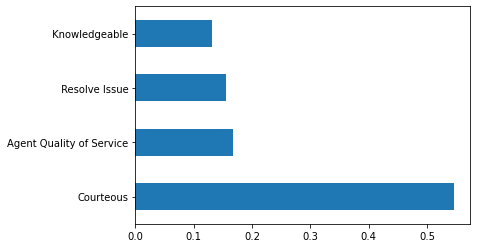

In [40]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(6).plot(kind='barh')
plt.show()

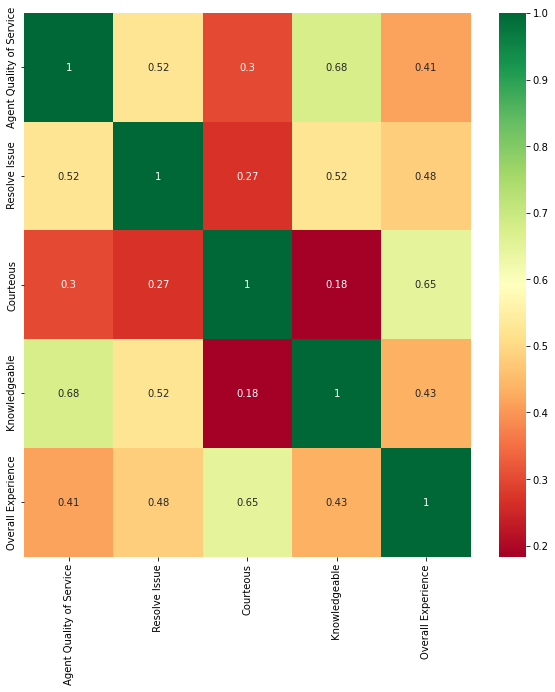

In [38]:
df = df.iloc[:, 0:5]
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")